In [ ]:
# ライブラリのインポート
import matplotlib.pyplot as plt

import argparse

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

# データセットの読み込みと前処理

In [ ]:
# Fashion-MNISTデータセットの読み込み
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# (28,28)の画像データを(784)のベクトルに変換して正規化を行う 
# (60000, 28, 28)の訓練データを(60000, 784)の2階テンソルに変換
x_train = x_train.reshape(-1, 784)

# 訓練データをfloat32(浮動小数点数)型に、255で割ってスケール変換する
x_train = x_train.astype('float32') / 255

# (10000, 28, 28)のテストデータを(10000, 784)の2階テンソルに変換
x_test = x_test.reshape(-1, 784)

# テストデータをfloat32(浮動小数点数)型に、255で割ってスケール変換する
x_test = x_test.astype('float32') / 255

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
# ハイパーパラメータの設定
parser = argparse.ArgumentParser()
parser.add_argument('--epochs', type=int, default=500)
parser.add_argument('--batch_size', type=int, default=64)
parser.add_argument('--patience', type=int, default=20) # earlystoppingの監視対象回数
parser.add_argument('--lr', type=int, default=0.001) # 学習率
opt = parser.parse_args(args=[])
print(opt)

Namespace(batch_size=64, epochs=500, lr=0.001, patience=20)


# モデルの定義


In [ ]:
# ニューラルネットワークの構築

# 隠れ層
model = Sequential()                # Sequentialオブジェクトの生成
model.add(Dense(256,                # 隠れ層のニューロン数は256
                input_dim=784,      # 入力層のデータサイズは784
                activation='relu')) # 活性化はReLU              
# ドロップアウト
model.add(Dropout(0.5))

model.add(Dense(10,                    # 出力層のニューロン数は10
                activation='softmax')) # 活性化はソフトマックス関数 
               

# モデルのコンパイル
model.compile(                       # オブジェクトのコンパイル
    loss='sparse_categorical_crossentropy', # スパース行列対応クロスエントロピー誤差
    optimizer=SGD(lr=opt.lr),        # オプティマイザーはSGD
    metrics=['accuracy']             # 学習評価として正解率を指定
)

model.summary() # ニューラルネットワークのサマリ（概要）を出力

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# 学習

In [ ]:
# 早期終了を行うEarlyStoppingを生成
early_stopping = EarlyStopping(
    monitor='val_loss', # 監視対象は損失
    patience=5,         # 監視する回数
    verbose=1           # 早期終了をログとして出力
)

# 学習を行って結果を出力
history = model.fit(
    x_train,           # 訓練データ
    y_train,           # 正解ラベル
    epochs=opt.epochs, # 学習を繰り返す回数
    batch_size=opt.batch_size,  # ミニバッチのサイズ
    verbose=1,              # 学習の進捗状況を出力する
    validation_split= 0.2,  # 検証データとして使用する割合
    shuffle=True, # 検証データを抽出する際にシャッフルする
    callbacks=[early_stopping]# コールバックはリストで指定する
)

# テストデータで学習を評価するデータを取得
score = model.evaluate(x_test, y_test, verbose=0)

# テストデータの誤り率を出力
print('Test loss:', score[0])

# テストデータの正解率を出力
print('Test accuracy:', score[1])

Epoch 1/500
750/750 [==============================] - 4s 5ms/step - loss: 1.9268 - accuracy: 0.3433 - val_loss: 1.4139 - val_accuracy: 0.6505
Epoch 2/500
750/750 [==============================] - 3s 4ms/step - loss: 1.3565 - accuracy: 0.5692 - val_loss: 1.1050 - val_accuracy: 0.6885
Epoch 3/500
750/750 [==============================] - 3s 4ms/step - loss: 1.1522 - accuracy: 0.6266 - val_loss: 0.9636 - val_accuracy: 0.7151
Epoch 4/500
750/750 [==============================] - 3s 4ms/step - loss: 1.0424 - accuracy: 0.6528 - val_loss: 0.8814 - val_accuracy: 0.7321
Epoch 5/500
750/750 [==============================] - 3s 4ms/step - loss: 0.9678 - accuracy: 0.6752 - val_loss: 0.8268 - val_accuracy: 0.7432
Epoch 6/500
750/750 [==============================] - 3s 5ms/step - loss: 0.9142 - accuracy: 0.6909 - val_loss: 0.7870 - val_accuracy: 0.7502
Epoch 7/500
750/750 [==============================] - 3s 4ms/step - loss: 0.8777 - accuracy: 0.7033 - val_loss: 0.7559 - val_accuracy: 0.7584

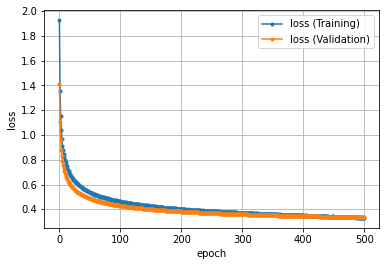

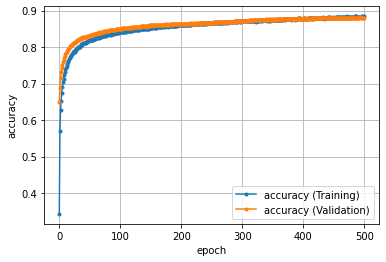

In [ ]:
# 損失、正解率をグラフにする

plt.plot(history.history['loss'], marker='.', label='loss (Training)') # 訓練データの損失をプロット
plt.plot(history.history['val_loss'], marker='.', label='loss (Validation)') # 検証データの損失をプロット
plt.legend()         # 凡例を表示
plt.grid()           # グリッド表示
plt.xlabel('epoch')  # x軸ラベル
plt.ylabel('loss')   # y軸ラベル
plt.show()

plt.plot(history.history['accuracy'], marker='.', label='accuracy (Training)') # 訓練データの精度をプロット
plt.plot(history.history['val_accuracy'], marker='.', label='accuracy (Validation)') # 検証データの精度をプロット
plt.legend(loc='best') # 凡例を表示
plt.grid()             # グリッド表示
plt.xlabel('epoch')    # x軸ラベル
plt.ylabel('accuracy') # y軸ラベル
plt.show()